# About Dataset
## Context

This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.
Content<br>
#### Anime.csv<br>
•   anime_id - myanimelist.net's unique id identifying an anime.<br>
•	name - full name of anime.<br>
•	genre - comma separated list of genres for this anime.<br>
•	type - movie, TV, OVA, etc.<br>
•	episodes - how many episodes in this show. (1 if movie).<br>
•	rating - average rating out of 10 for this anime.<br>
•	members - number of community members that are in this anime's "group". <br>

<h4> Rating.csv </h4><br>
•	user_id - non identifiable randomly generated user id.<br>
•	anime_id - the anime that this user has rated.<br>
•	rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).<br>
<h4> Acknowledgements </h4><br>
Thanks to myanimelist.net API for providing anime data and user ratings.
Inspiration<br>
New age better anime recommendation system based only on user viewing history
r viewing history
r viewing history
expand_moreView more


# Import the Neccessary Libraries

In [5]:
import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
import matplotlib.cm as cm
import numpy as np
import random
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.width', 300)
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

## Load the Datasets

In [2]:
anime_ = pd.read_csv(r"C:\Users\Joben\Desktop\MSc Real World Applications\archive\anime.csv")
rating_ = pd.read_csv(r"C:\Users\Joben\Desktop\MSc Real World Applications\archive\rating.csv")
anime = anime_.copy()
rating = rating_.copy()

In [6]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [7]:
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


## Merge the Datasets

In [8]:
merged_df =pd.merge(anime, rating, on ='anime_id',how='inner')

In [9]:
merged_df

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


## Handling Missing Values

In [10]:
merged_df.isna().sum()

anime_id      0
name          0
genre       110
type          4
episodes      0
rating_x      6
members       0
user_id       0
rating_y      0
dtype: int64

In [11]:
merged_df.dropna(inplace = True)

In [12]:
merged_df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating_x    0
members     0
user_id     0
rating_y    0
dtype: int64

## Data Cleaning

In [13]:
# Get duplicates in the dataset
merged_df.duplicated().sum() 

1

In [14]:
merged_df.drop_duplicates(inplace=True) # remove duplicates
merged_df.drop(columns='rating_y',inplace=True) # remove unneccessary columns

## Understand the Data Type

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7813610 entries, 0 to 7813726
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   anime_id  int64  
 1   name      object 
 2   genre     object 
 3   type      object 
 4   episodes  object 
 5   rating_x  float64
 6   members   int64  
 7   user_id   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 536.5+ MB


## Identify the rows that cannot be converted to integer in the episodes columns

In [16]:
invalid_literal_rows = merged_df[~merged_df['episodes'].astype(str).str.isnumeric()]
invalid_literal_rows

,anime_id,name,genre,type,episodes,rating_x,members,user_id
7686348,32237,Burutabu-chan,"Comedy, Fantasy, Magic",TV,Unknown,5.00,37,12431
7686525,27551,Deko Boko Friends,"Comedy, Kids",TV,Unknown,7.14,61,48766
7688629,21981,Pic-lele,Kids,TV,Unknown,6.33,59,48766
7689759,33846,Yurugaro,"Comedy, Fantasy",Special,Unknown,4.74,153,13954


## Check if the episodes column contains 0 values

In [17]:
merged_df[merged_df['episodes']==0]

,anime_id,name,genre,type,episodes,rating_x,members,user_id


## we will assign 0 to the unknown rows and convert it to integer

In [18]:
merged_df['episodes'] = merged_df['episodes'].replace('Unknown',0).astype(int)
merged_df.rename(columns={'rating_x':'rating'}, inplace=True)
merged_df

,anime_id,name,genre,type,episodes,rating,members,user_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278
...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364


In [17]:
merged_df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
user_id     0
dtype: int64

## Get the rating value between 1.0 to 5.0 Scale

In [18]:
merged_df['rating'] = merged_df['rating']/2
merged_df['rating'] = merged_df['rating'].round()
merged_df

,anime_id,name,genre,type,episodes,rating,members,user_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,5.0,200630,99
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,5.0,200630,152
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,5.0,200630,244
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,5.0,200630,271
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,5.0,200630,278
...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,2.0,175,39532
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,2.0,175,48766
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,2.0,175,60365
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,3.0,142,27364


## See the Minumum and the Maximum Rating Value

In [19]:
print('Highest rating',merged_df.rating.max())
print('Lowest rating',merged_df.rating.min())

Highest rating 5.0
Lowest rating 1.0


## Convert the genre and types columns to categorical datatype

In [20]:
merged_df[['type','genre']] = merged_df[['type','genre']].astype("category")
merged_df[['type','genre']].dtypes

type     category
genre    category
dtype: object

# Descriptive Statistics

In [21]:
# Describe the numerical columns
merged_df.describe(include='number')

,anime_id,episodes,rating,members,user_id
count,7.813610e+06,7.813610e+06,7.813610e+06,7.813610e+06,7.813610e+06
mean,8.908728e+03,1.844149e+01,3.861556e+00,1.786233e+05,3.672799e+04
std,8.883598e+03,3.508517e+01,3.834383e-01,1.881764e+05,2.099793e+04
min,1.000000e+00,0.000000e+00,1.000000e+00,2.900000e+01,1.000000e+00
25%,1.240000e+03,2.000000e+00,4.000000e+00,4.403000e+04,1.897400e+04
50%,6.213000e+03,1.200000e+01,4.000000e+00,1.104700e+05,3.679100e+04
75%,1.409300e+04,2.400000e+01,4.000000e+00,2.442680e+05,5.475800e+04
max,3.451900e+04,1.818000e+03,5.000000e+00,1.013917e+06,7.351600e+04


In [22]:
# Describe the categorical and object columns
merged_df.describe(include=['object','category'])

,name,genre,type
count,7813610,7813610,7813610
unique,11161,3154,6
top,Death Note,Hentai,TV
freq,39340,62435,5283595


# Data Visualisation

## Visualise the anime distribution

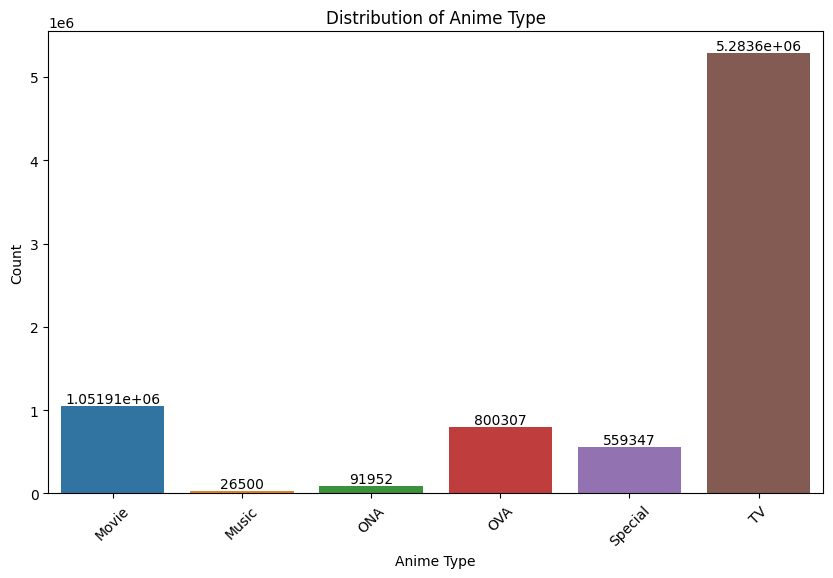

In [87]:
# create a barplot for anime types
plt.figure(figsize=(10,6))
ax = sns.countplot(data=merged_df,x='type')
plt.title("Distribution of Anime Type")
plt.xlabel("Anime Type")
plt.ylabel("Count")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

## Rating Distribution

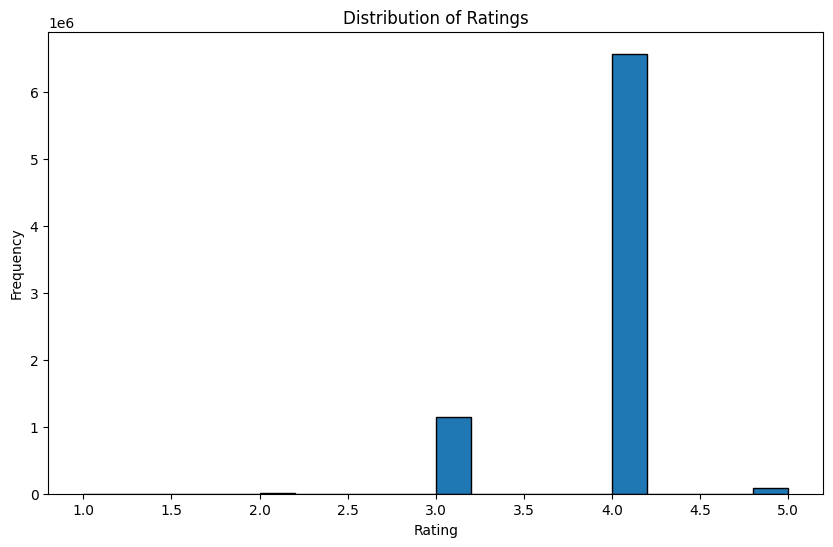

In [89]:
# Create histogram  of ratings
plt.figure(figsize=(10,6))
plt.hist(merged_df["rating"],bins= 20, edgecolor="black")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

## Rating vs. Popularity

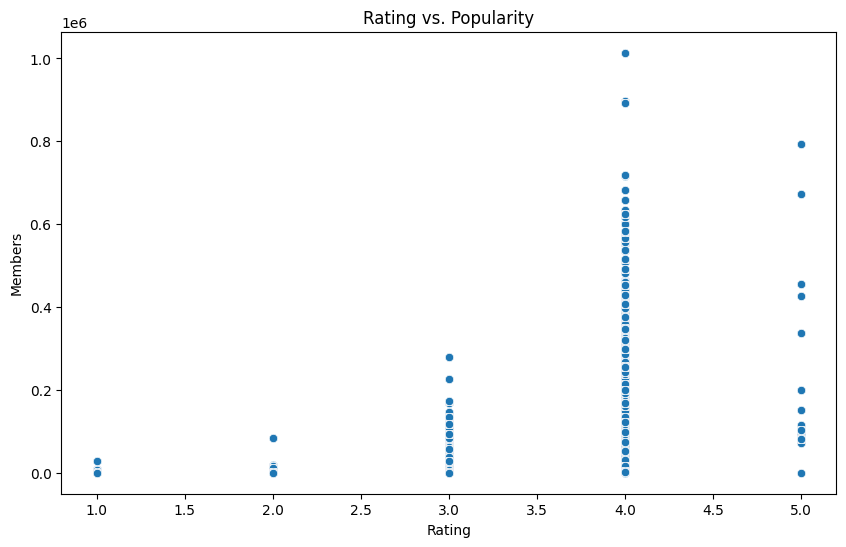

In [90]:
# Create a scatter plot of ratings vs popularity
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df,x='rating',y="members")
plt.title("Rating vs. Popularity")
plt.xlabel("Rating")
plt.ylabel("Members")
plt.show()

## Ratings by Type Visualisation

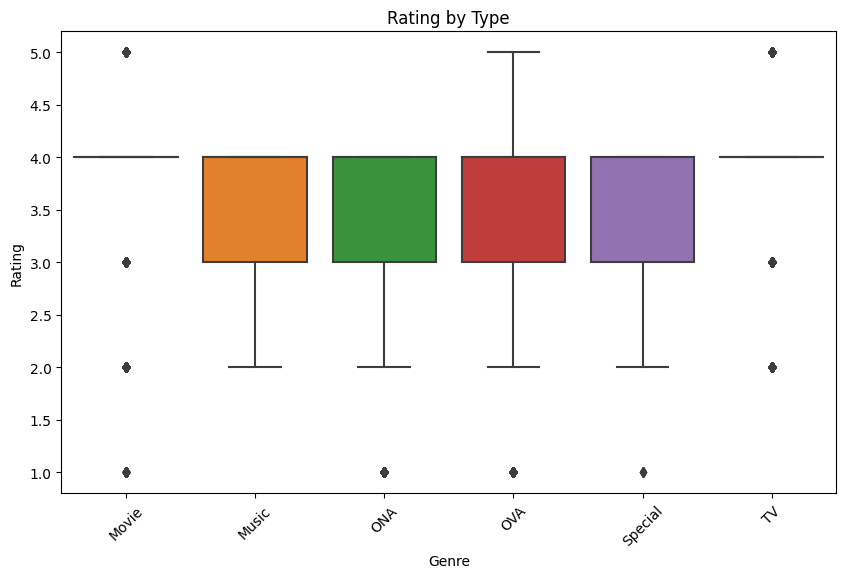

In [91]:
# Create a box plot of rating by genre
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df,x='type',y='rating')
plt.title('Rating by Type')
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()

## Genre Distribution Visualisation

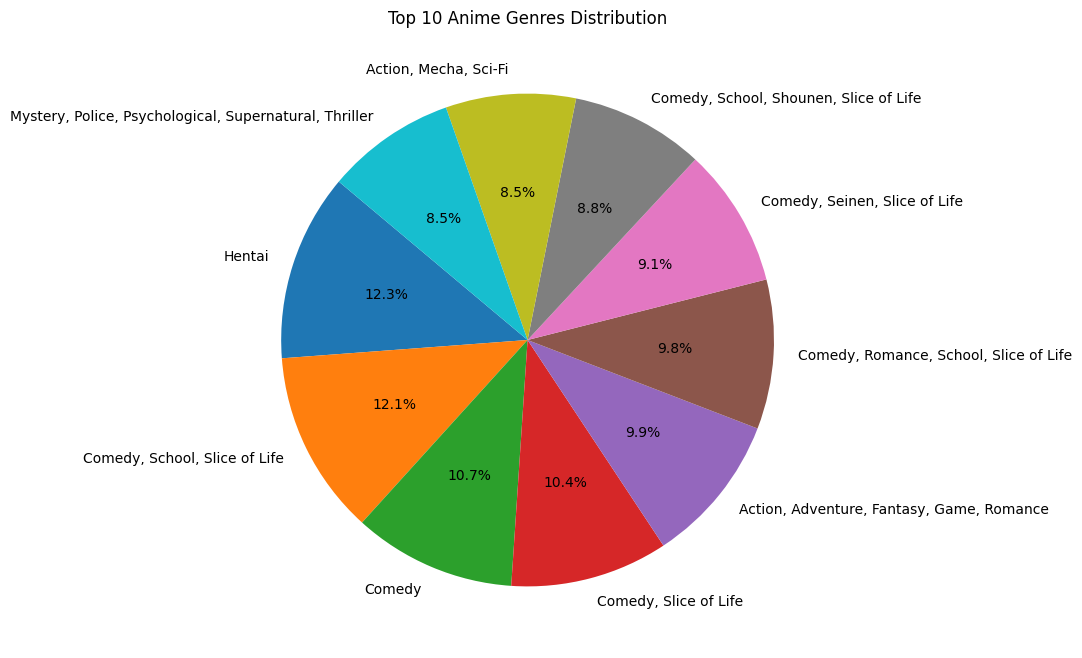

In [92]:
# Create a pie chart of genre distribution
genre_counts = merged_df["genre"].value_counts()[:10] # Display 10 genres
plt.figure(figsize=(8,8))
plt.pie(genre_counts,labels=genre_counts.index,autopct="%1.1f%%",startangle=140)
plt.title("Top 10 Anime Genres Distribution")
plt.show()

# Exploratory Data Analysis

##  Anime Names Value Counts

In [93]:
name_count = merged_df['name'].value_counts()
name_count_total = name_count.sum()
name_count_percentage = name_count/name_count_total * 100
name_count_percentage.reset_index(name='name_percentage')

,name,name_percentage
0,Death Note,0.503480
1,Sword Art Online,0.391407
2,Shingeki no Kyojin,0.378609
3,Code Geass: Hangyaku no Lelouch,0.354740
4,Elfen Lied,0.352027
...,...,...
11156,Youtai Nuhai Zai Shanghai,0.000013
11157,Nagareboshi no Okurimono,0.000013
11158,Youkaiden Nekome Kozou,0.000013
11159,Youkai Ninpouchou Jiraiya! Special,0.000013


## Genre Value Counts

In [96]:
# Count the number of each genre in the dataset
genre_count = merged_df['genre'].value_counts()
# Get the total of all genre 
genre_count_total = genre_count.sum()
genre_count_percentage = genre_count/genre_count_total * 100
genre_count_percentage.reset_index(name='genre_percentage')

,genre,genre_percentage
0,Hentai,0.799054
1,"Comedy, School, Slice of Life",0.785860
2,Comedy,0.693073
3,"Comedy, Slice of Life",0.672788
4,"Action, Adventure, Fantasy, Game, Romance",0.640562
...,...,...
3149,"Action, Demons, Historical, Martial Arts, Samu...",0.000013
3150,"Action, Comedy, School, Slice of Life",0.000013
3151,"Action, Adventure, Demons, Fantasy, Shounen",0.000013
3152,"Action, Comedy, Romance, Shounen",0.000013


In [97]:
# Genre Average
merged_df['genre'].value_counts().mean()

2477.3652504755864

## Anime Memebers Percentage

In [98]:
anime_count = merged_df['members'].value_counts()
anime_count_total = anime_count.sum()
anime_count_percentage = anime_count/anime_count_total * 100
anime_count_percentage.reset_index(name='Members_percentage')

,members,Members_percentage
0,1013917,0.503480
1,893100,0.391407
2,896229,0.378609
3,715151,0.354740
4,623511,0.352027
...,...,...
6478,2447,0.000013
6479,29,0.000013
6480,11086,0.000013
6481,4088,0.000013


## Members Average

In [99]:
merged_df['members'].value_counts().mean()

1205.2460280734228

# Anime Type Analysis
## How many percent of the anime type 

In [100]:
type_count = merged_df['type'].value_counts()
type_count_total = anime_count.sum()
type_count_percentage = type_count/type_count_total * 100
type_count_percentage.reset_index(name='type_percentage')

,type,type_percentage
0,TV,67.620408
1,Movie,13.462522
2,OVA,10.242474
3,Special,7.158625
4,ONA,1.176818
5,Music,0.339152


## Type Average

In [23]:
merged_df.type.value_counts().mean()

1302268.3333333333

### Anime type distribution

In [102]:
# Anime count for each type 
type_counts = merged_df["type"].value_counts()
# Get the average rating for each type
type_average_ratings = merged_df.groupby("type")["rating"].mean()
# Print the result
print("Average rating for each anime type:\n",type_average_ratings)

Average rating for each anime type:
 type
Movie      3.914955
Music      3.572038
ONA        3.561989
OVA        3.642656
Special    3.734973
TV         3.904148
Name: rating, dtype: float64


## Rating Percentage

In [103]:
rating_count = merged_df['rating'].value_counts()
rating_count_total = rating_count.sum()
rating_count_percentage = rating_count/rating_count_total * 100
rating_count_percentage.reset_index(name='rating_percentage')

,rating,rating_percentage
0,4.0,84.072893
1,3.0,14.587111
2,5.0,1.148790
3,2.0,0.167515
4,1.0,0.023689


## Episodes Percentage

In [26]:
episodes_count = merged_df['episodes'].value_counts()

episodes_count_total = episodes_count.sum()
episodes_count_percentage = episodes_count/episodes_count_total * 100
episodes_count_percentage.reset_index(name='episodes_percentage')

,episodes,episodes_percentage
0,1,22.667794
1,12,22.197077
2,13,12.198267
3,26,6.941107
4,24,6.870038
...,...,...
179,283,0.000013
180,475,0.000013
181,83,0.000013
182,71,0.000013


## Episodes Average

In [105]:
merged_df.episodes.value_counts().mean()

42465.27173913043

## Genre Analysis

### Top 10 most loved genre

In [106]:
top10_genre = merged_df.where(merged_df['rating']==5.0).genre.value_counts().sort_values(ascending=False).head(10)
five_star = top10_genre.reset_index(name='count')
five_star

,genre,count
0,"Action, Adventure, Drama, Fantasy, Magic, Mili...",24574
1,"Sci-Fi, Thriller",19283
2,"Drama, Fantasy, Romance, Slice of Life, Supern...",17854
3,"Action, Comedy, Historical, Parody, Samurai, S...",15095
4,"Action, Adventure, Shounen, Super Power",8575
5,"Drama, Romance, School, Supernatural",2199
6,"Comedy, Drama, School, Shounen, Sports",1233
7,"Drama, Military, Sci-Fi, Space",903
8,"Drama, School, Shounen",44
9,Slice of Life,1


### Top Five 5-Star Genre Rating

In [107]:
top_5_rating = merged_df[merged_df['rating']==5.0]
top= top_5_rating.groupby('genre').size()
top_5 = top.nlargest(5).reset_index(name='count')
top_5['total_counts'] = top_5['count'].sum()
top_5['genre_percentage'] = top_5['count']/top_5['total_counts'] * 100
top_5['genre_percentage'] = top_5.genre_percentage.round()
top_5

,genre,count,total_counts,genre_percentage
0,"Action, Adventure, Drama, Fantasy, Magic, Mili...",24574,85381,29.0
1,"Sci-Fi, Thriller",19283,85381,23.0
2,"Drama, Fantasy, Romance, Slice of Life, Supern...",17854,85381,21.0
3,"Action, Comedy, Historical, Parody, Samurai, S...",15095,85381,18.0
4,"Action, Adventure, Shounen, Super Power",8575,85381,10.0


## Top 10 most disliked genre

In [108]:
top_10_genre = merged_df.where(merged_df['rating']==1.0).genre.value_counts().sort_values(ascending=False).head(10)
one_star = top_10_genre.reset_index(name='count')
one_star

,genre,count
0,"Horror, Sci-Fi",1131
1,"Mecha, Sci-Fi",237
2,"Comedy, Romance",231
3,Dementia,106
4,"Comedy, Dementia",91
5,Hentai,15
6,"Action, Comedy, Ecchi",15
7,Horror,12
8,Kids,3
9,"Action, Mecha, Sci-Fi",2


## The Most loved genre

In [27]:
# Calculate the average rating for each genre
genre_avg_rating = merged_df.groupby('genre')['rating'].mean()

# Sort genres by average rating in descending order to get the most loved genres
most_loved_genres = genre_avg_rating.sort_values(ascending=False)

# print the most loved gmost_loved_genres
print("Most loved Genres:",most_loved_genres)

Most loved Genres: genre
Drama, Fantasy, Romance, Slice of Life, Supernatural            5.000000
Action, Adventure, Drama, Fantasy, Magic, Military, Shounen     5.000000
Drama, School, Shounen                                          5.000000
Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen    4.821228
Drama, Romance, School, Supernatural                            4.662760
                                                                  ...   
Action, Historical, Kids                                        2.000000
Action, Adventure, Demons, Fantasy, Shounen                     2.000000
Comedy, Dementia                                                1.851406
Horror, Sci-Fi                                                  1.040712
Comedy, Dementia, Fantasy, Horror, Music, Parody                1.000000
Name: rating, Length: 3154, dtype: float64


### The Most Dislike Genre

In [28]:
# Sort genres by average rating in ascending order to get the most disliked gmost_loved_genres
most_disliked_genres = genre_avg_rating.sort_values()

# Print most disliked genres
print("Most Disliked Genres:")
display(most_disliked_genres.head())

Most Disliked Genres:


genre
Comedy, Dementia, Fantasy, Horror, Music, Parody    1.000000
Horror, Sci-Fi                                      1.040712
Comedy, Dementia                                    1.851406
Action, Comedy, Martial Arts, Shounen               2.000000
Comedy, Parody, Sports                              2.000000
Name: rating, dtype: float64

## Movie Analysis

### What is the percentage of members who somuch love watching movie? 

In [29]:
rating=merged_df[(merged_df['type']=='Movie') & (merged_df['rating']==5.0)].groupby(by=['members','name'])
total_rating = rating.size()
users = total_rating
liked_percentage = users/users.sum()
top_liked = liked_percentage.reset_index(name='liked_percentage')
top_liked.sort_values(by='liked_percentage',ascending=False).round(2)

,members,name,liked_percentage
1,72534,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,0.53
3,200630,Kimi no Na wa.,0.46
2,102733,Koe no Katachi,0.01
0,62,Mogura no Motoro,0.00


### Which are the top five movies?

In [30]:
five_star_rating = merged_df[(merged_df['rating']==5.0) & (merged_df['type']=='Movie')]
genre_count = five_star_rating.groupby(by=['members','name','type','genre'])['genre'].count()
genre_df = genre_count.reset_index(name='genre_count')
genre_df['genre_total'] = genre_df['genre_count'].sum()
genre_df['genre_percentage'] = genre_df['genre_count']/genre_df['genre_total']*100
genre_df.drop(columns=['genre_total'],inplace=True)
genre_DF = genre_df.sort_values(by=['genre_count','genre_percentage'],ascending=False).head(5)
#genre_DF = genre_df[['type', 'genre', 'genre_count', 'genre_percentage']]
genre_DF['genre_percentage'] = genre_DF['genre_percentage'].round(2)
genre_DF

,members,name,type,genre,genre_count,genre_percentage
76214,72534,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Movie,"Action, Comedy, Historical, Parody, Samurai, S...",2525,52.95
248620,200630,Kimi no Na wa.,Movie,"Drama, Romance, School, Supernatural",2199,46.11
191874,102733,Koe no Katachi,Movie,"Drama, School, Shounen",44,0.92
59917,62,Mogura no Motoro,Movie,Slice of Life,1,0.02
0,62,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Movie,Action,0,0.00


### Which Movie is mostly dislike by members?

In [31]:
rating=merged_df[(merged_df['type']=='Movie') & (merged_df['rating']==1.0)].groupby(by=['members','name'])
total_rating = rating.size()
users = total_rating
liked_percentage = users/users.sum()
top_liked = liked_percentage.reset_index(name='liked_percentage')
top_liked.sort_values(by='liked_percentage',ascending=False).round(2)

,members,name,liked_percentage
3,1893,Ningen Doubutsuen,0.74
2,1817,Nami,0.23
0,121,Roboteuwang Sseonsyakeu,0.02
1,129,Hi Gekiga Ukiyoe Senya Ichiya,0.02


### Which are the Most Frequently Watched Movies?

In [32]:
# Filter rows where type is "Movie"
movie_df = merged_df[merged_df["type"]=="Movie"]

# Sort movies by the number of members who have watched them (in ascending order)
frequently_watched_movies = movie_df.sort_values(by="members",ascending=False)

# Print the most frequently watched mfrequently_watched_movies
print(frequently_watched_movies)

         anime_id                           name                           genre   type  episodes  rating  members  user_id
135237        199  Sen to Chihiro no Kamikakushi  Adventure, Drama, Supernatural  Movie         1     4.0   466254    55246
131701        199  Sen to Chihiro no Kamikakushi  Adventure, Drama, Supernatural  Movie         1     4.0   466254    45642
131712        199  Sen to Chihiro no Kamikakushi  Adventure, Drama, Supernatural  Movie         1     4.0   466254    45677
131711        199  Sen to Chihiro no Kamikakushi  Adventure, Drama, Supernatural  Movie         1     4.0   466254    45675
131710        199  Sen to Chihiro no Kamikakushi  Adventure, Drama, Supernatural  Movie         1     4.0   466254    45673
...           ...                            ...                             ...    ...       ...     ...      ...      ...
7689399     24803               Tobidasu Ehon 3D                            Kids  Movie         1     3.0       42    48766
7686170 

## Anime Type Analysis

In [33]:
type_counts = merged_df['type'].value_counts()

type_count_total = type_counts.sum()
type_count_percentage = type_counts/type_count_total * 100
type_count_percentage.reset_index(name='anime_type_percentage')

,type,anime_type_percentage
0,TV,67.620408
1,Movie,13.462522
2,OVA,10.242474
3,Special,7.158625
4,ONA,1.176818
5,Music,0.339152


## Anime types Counts

In [34]:
merged_df.groupby('type')['type'].count()

type
Movie      1051909
Music        26500
ONA          91952
OVA         800307
Special     559347
TV         5283595
Name: type, dtype: int64

### The Most Loved Anime Type

In [35]:
# Calculate the average rating for each anime type
type_avg_rating = merged_df.groupby("type")["rating"].mean()

# Find the anime type with the highest average rating
most_loved_type = type_avg_rating.idxmax()

# Print the most loved anime type
print("Most loved Anime Type:",most_loved_type)

Most loved Anime Type: Movie


## Music Rating Analysis
### Which users gave the highest rating for music? 

In [36]:
music_rating = merged_df[(merged_df["rating"] <= 5.0) & (merged_df['type'] == "Music")]
music_rating.head(5)

,anime_id,name,genre,type,episodes,rating,members,user_id
1101572,34240,Shelter,"Music, Sci-Fi",Music,1,4.0,71136,17
1101573,34240,Shelter,"Music, Sci-Fi",Music,1,4.0,71136,46
1101574,34240,Shelter,"Music, Sci-Fi",Music,1,4.0,71136,77
1101575,34240,Shelter,"Music, Sci-Fi",Music,1,4.0,71136,99
1101576,34240,Shelter,"Music, Sci-Fi",Music,1,4.0,71136,244


Shelter is the only music title/name that was placed a 4 star review whith 71136 members who had listed to the song.

## Which are the preferred music by random users

In [37]:
# Filter rows where type is "music"
music_df = merged_df[merged_df["type"] == "Music"]

# Generate random indices to select random users
num_users = 10
random_users_indices = np.random.choice(music_df.index, size=num_users, replace=False)

# Get the preferred music by random users with the highest ratings
preferred_music = music_df.loc[random_users_indices].sort_values(by="rating",ascending=False)

# Print the preferred mmusic
print(preferred_music)

         anime_id                                               name                                              genre   type  episodes  rating  members  user_id
4063346      2768                              CLAMP in Wonderland 2  Action, Comedy, Drama, Fantasy, Magic, Music, ...  Music         1     4.0    13985    29517
1794295       731  Interstella5555: The 5tory of The 5ecret 5tar ...                    Adventure, Drama, Music, Sci-Fi  Music         1     4.0    31464    32931
5909839      6548  Tengen Toppa Gurren Lagann: Kirameki★Yoko Box ...                                       Ecchi, Music  Music         1     4.0    18991    65682
1101959     34240                                            Shelter                                      Music, Sci-Fi  Music         1     4.0    71136    17346
5731527     12079                                 Black★Rock Shooter                                      Action, Music  Music         1     4.0    40641    65175
6406830      8348     

### The Most Disliked Music by Random Users

In [38]:
# Get the preferred music by random users with the highest ratings
disliked_music = music_df.loc[random_users_indices].sort_values(by="rating",ascending=True)

# Print the preferred mmusic
print(disliked_music)

         anime_id                                               name                                              genre   type  episodes  rating  members  user_id
7066218      5016                                        Fluximation                                              Music  Music        14     3.0     2240    53103
4063346      2768                              CLAMP in Wonderland 2  Action, Comedy, Drama, Fantasy, Magic, Music, ...  Music         1     4.0    13985    29517
1794295       731  Interstella5555: The 5tory of The 5ecret 5tar ...                    Adventure, Drama, Music, Sci-Fi  Music         1     4.0    31464    32931
5909839      6548  Tengen Toppa Gurren Lagann: Kirameki★Yoko Box ...                                       Ecchi, Music  Music         1     4.0    18991    65682
1101959     34240                                            Shelter                                      Music, Sci-Fi  Music         1     4.0    71136    17346
5731527     12079     

## TV Shows Analysis

## What is the percentage of users who loved to watch tv shows

In [39]:
# Filter rows where type "TV"
tv_df = merged_df[merged_df['type'] == 'TV']

# Count the number of users who watched TV shows
users_watched_tv = tv_df['members'].sum()

# Calculate the total number of users in the dataset
total_users = merged_df['members'].sum()

# Calculate the percentage of users who loved to watch tv shows
percentage_users_watched_tv = (users_watched_tv / total_users) * 100

print("Percentage of users who loved to watch tv shows:",percentage_users_watched_tv)

Percentage of users who loved to watch tv shows: 87.42043770229574


In [40]:
random_users = random.choice(merged_df.values)
random_users

array([1212, 'Oban Star-Racers', 'Adventure, Mecha, Sci-Fi, Shounen',
       'TV', 26, 4.0, 24156, 13144], dtype=object)

## Most Loved Movies with 5 Star Rating by Anime

In [28]:
mv_df = merged_df[(merged_df['type'] == 'Movie') & (merged_df['rating'] == 5.0)]
mv_df

,anime_id,name,genre,type,episodes,rating,members,user_id
7672212,29597,Hana,Comedy,Movie,1,5.0,207,12431
7672213,29597,Hana,Comedy,Movie,1,5.0,207,71038
7672222,7032,Kitte no Gensou,Comedy,Movie,1,5.0,428,7081
7672223,7032,Kitte no Gensou,Comedy,Movie,1,5.0,428,12431
7672224,7032,Kitte no Gensou,Comedy,Movie,1,5.0,428,25528
7672225,7032,Kitte no Gensou,Comedy,Movie,1,5.0,428,28517
7672226,7032,Kitte no Gensou,Comedy,Movie,1,5.0,428,29075
7672227,7032,Kitte no Gensou,Comedy,Movie,1,5.0,428,29868
7672228,7032,Kitte no Gensou,Comedy,Movie,1,5.0,428,34232
7672229,7032,Kitte no Gensou,Comedy,Movie,1,5.0,428,44594


# Feature Engineering

In [125]:
# Initialize the label encoder to the label encoder variable
label_encoder = LabelEncoder()
# transform the type column into numerical one
merged_df['type'] = label_encoder.fit_transform(merged_df.type)
# Display the dataframe
display(merged_df)

,anime_id,name,genre,type,episodes,rating,members,user_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,5.0,200630,99
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,5.0,200630,152
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,5.0,200630,244
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,5.0,200630,271
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,5.0,200630,278
...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,3,1,2.0,175,39532
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,3,1,2.0,175,48766
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,3,1,2.0,175,60365
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,0,1,3.0,142,27364


# Feature Selection

<Axes: title={'center': 'Correlation Heatmap'}>

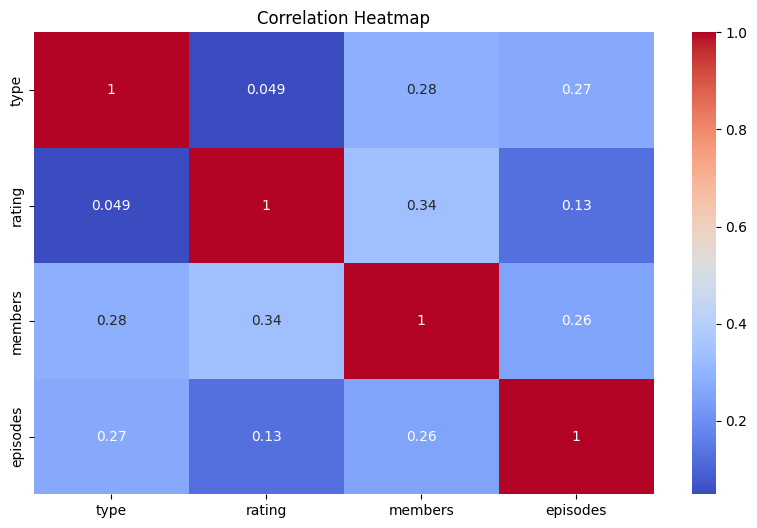

In [126]:
# create a heatmap of correlation
correlation_matrix = merged_df[["type","rating","members","episodes"]].corr()
plt.figure(figsize=(10,6))
plt.title("Correlation Heatmap")
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")

## Step 1: Feature Selection

In [127]:
numerical_features = ["type","rating","members","episodes"]

It seems there is no reasonable correlation among these features but we are going to use them.

## Step 2: Data Preprocessing 

In [128]:
# Initialize the scaler 
scaler = StandardScaler()
# Normalize features
merged_df[numerical_features] = scaler.fit_transform(merged_df[numerical_features])
# Display scaled features
display(merged_df[numerical_features])

,type,rating,members,episodes
0,-2.306378,2.969042,0.116947,-0.497119
1,-2.306378,2.969042,0.116947,-0.497119
2,-2.306378,2.969042,0.116947,-0.497119
3,-2.306378,2.969042,0.116947,-0.497119
4,-2.306378,2.969042,0.116947,-0.497119
...,...,...,...,...
7813722,-0.577272,-4.854904,-0.948303,-0.497119
7813723,-0.577272,-4.854904,-0.948303,-0.497119
7813724,-0.577272,-4.854904,-0.948303,-0.497119
7813725,-2.306378,-2.246922,-0.948479,-0.497119


## Step 3: Choose the number of clusters

In [129]:
# Calculate the within-cluster sum of squares (wcss) for different k values
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(merged_df[numerical_features])
    wcss.append(kmeans.inertia_)
    print("within cluster sum of squares",wcss)

within cluster sum of squares [31254439.999967486]
within cluster sum of squares [31254439.999967486, 23363536.416093193]
within cluster sum of squares [31254439.999967486, 23363536.416093193, 16375256.781011986]
within cluster sum of squares [31254439.999967486, 23363536.416093193, 16375256.781011986, 11440073.018615907]
within cluster sum of squares [31254439.999967486, 23363536.416093193, 16375256.781011986, 11440073.018615907, 7127978.823162623]
within cluster sum of squares [31254439.999967486, 23363536.416093193, 16375256.781011986, 11440073.018615907, 7127978.823162623, 6060446.318298196]
within cluster sum of squares [31254439.999967486, 23363536.416093193, 16375256.781011986, 11440073.018615907, 7127978.823162623, 6060446.318298196, 5337230.641170323]
within cluster sum of squares [31254439.999967486, 23363536.416093193, 16375256.781011986, 11440073.018615907, 7127978.823162623, 6060446.318298196, 5337230.641170323, 4645631.347071567]
within cluster sum of squares [31254439.99

## Step 4: Find the Optimal k visually

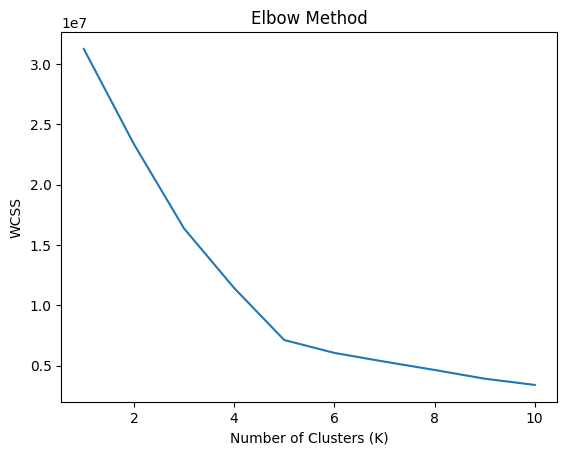

In [130]:
# Plot the Elbow method graph
plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

## Step 5: Choose the Optimal k

In [30]:
# Initialize and fit the KMeans model with the chosen k 
optimal_k = 5 
kmeans = KMeans(n_clusters=optimal_k,init="k-means++",random_state=42)
merged_df["cluster"] = kmeans.fit_predict(merged_df[numerical_features])
merged_df['cluster'].unique()

array([0, 4, 1, 2, 3])

In [132]:
# Display the dataframe
display(merged_df)

,anime_id,name,genre,type,episodes,rating,members,user_id,cluster
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",-2.306378,-0.497119,2.969042,0.116947,99,2
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",-2.306378,-0.497119,2.969042,0.116947,152,2
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",-2.306378,-0.497119,2.969042,0.116947,244,2
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",-2.306378,-0.497119,2.969042,0.116947,271,2
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",-2.306378,-0.497119,2.969042,0.116947,278,2
...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,-0.577272,-0.497119,-4.854904,-0.948303,39532,1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,-0.577272,-0.497119,-4.854904,-0.948303,48766,1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,-0.577272,-0.497119,-4.854904,-0.948303,60365,1
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,-2.306378,-0.497119,-2.246922,-0.948479,27364,1


### merged_df['cluster'] (i.e y_kmeans) gives us different clusters corresponding to numerical_features . Now, let’s plot all the clusters using matplotlibb

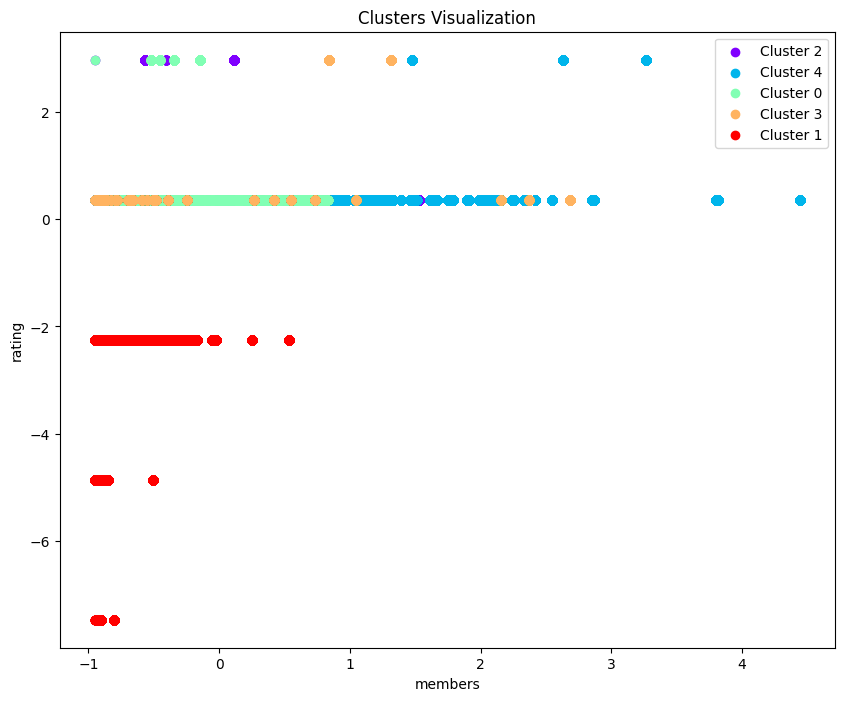

In [133]:
# Define the numerical features 
numerical_features = ['members','rating']

# Create a colormap with a unique color for each cluster
num_clusters = len(merged_df['cluster'].unique())
colors = plt.cm.rainbow(np.linspace(0,1, num_clusters))

# plot scatter plot for all clusters
plt.figure(figsize=(10,8))
for i, cluster_label in enumerate(merged_df['cluster'].unique()):
    cluster_data = merged_df[merged_df['cluster']==cluster_label]
    plt.scatter(cluster_data[numerical_features[0]],cluster_data[numerical_features[1]],label=f'Cluster {cluster_label}',color=colors[i])

plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.title("Clusters Visualization")
plt.legend()
plt.show()

## Step 6: Evaluate the clustering using different metrics

In [134]:
# Evaluate the clustering using silhouette score
sample_size = 30000
sample_data = merged_df[numerical_features].sample(n=sample_size,random_state=42)
sample_labels = merged_df["cluster"].sample(n=sample_size, random_state=42)
silhouette_avg_sample = silhouette_score(sample_data,sample_labels)
print("Silhouette Score:",silhouette_avg_sample)

Silhouette Score: 0.17227862669307728


In [135]:
# Evaluate the clustering using calinski_harabasz score 
calinski_harabasz = calinski_harabasz_score(sample_data,sample_labels)
print("calinski harabasz scores",calinski_harabasz)

calinski harabasz scores 28775.648205473353


In [136]:
# Evaluate clustering using the davies bouldin score
davies_bouldin_score = davies_bouldin_score(sample_data,sample_labels)
print("davies_bouldin_score",davies_bouldin_score)

davies_bouldin_score 4.576231853294196


##  Plot Calinski-Harabasz Index values

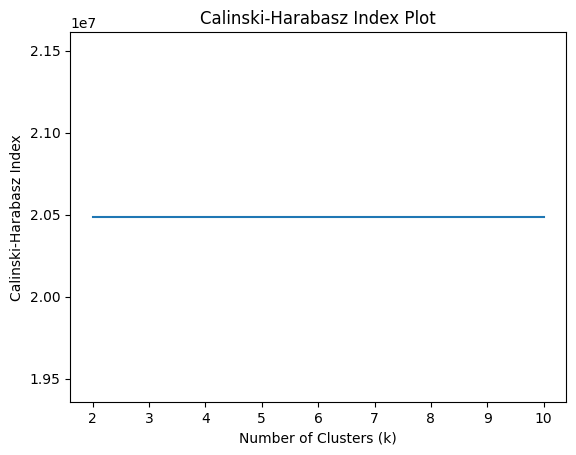

In [137]:
calinski_harabasz_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=5, random_state=42)
    cluster_labels = kmeans.fit_predict(merged_df[numerical_features])
    calinski_harabasz = calinski_harabasz_score(merged_df[numerical_features], cluster_labels)
    calinski_harabasz_scores.append(calinski_harabasz)

# Plot Calinski-Harabasz Index values
plt.plot(range(2, 11), calinski_harabasz_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Index")
plt.title("Calinski-Harabasz Index Plot")
plt.show()

## Plot Davies-Bouldin Index values

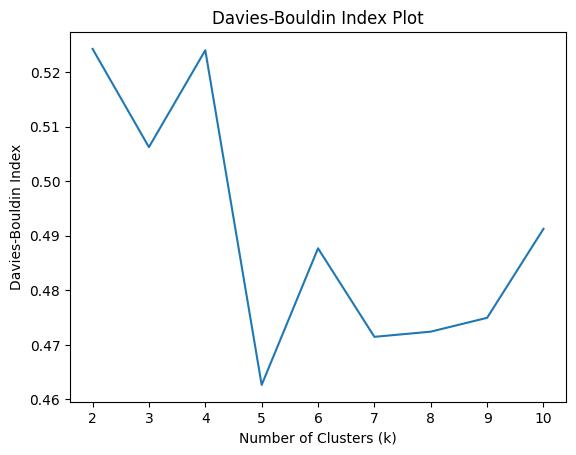

In [26]:
# Define the numerical features 
numerical_features = ['members','rating']
davies_bouldin_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(merged_df[numerical_features])
    davies_bouldin = davies_bouldin_score(merged_df[numerical_features], cluster_labels)
    davies_bouldin_scores.append(davies_bouldin)

# Plot Davies-Bouldin Index values
plt.plot(range(2, 11), davies_bouldin_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index Plot")
plt.show()

##  Plot inertia values

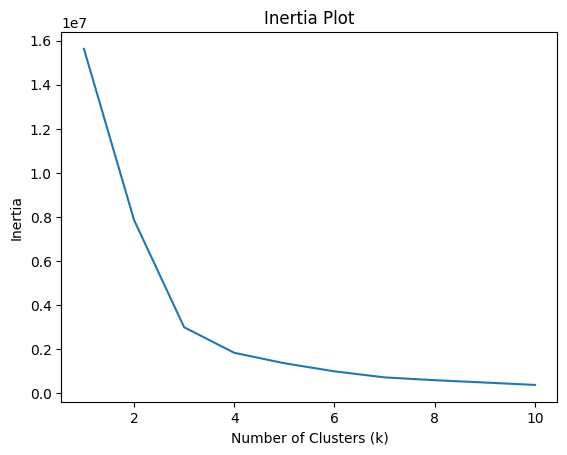

In [139]:
# Calculate inertia for different k values
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(merged_df[numerical_features])
    inertia_values.append(kmeans.inertia_)

# Plot inertia values
plt.plot(range(1, 11), inertia_values)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Inertia Plot")
plt.show()

## Step 7: Visualize the clusters

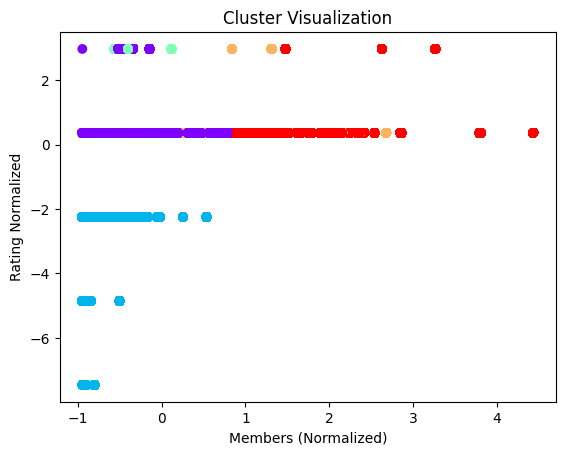

In [140]:
# Visualize the cluster using a scatter plot
plt.scatter(merged_df["members"],merged_df['rating'], c=merged_df["cluster"],cmap="rainbow")
plt.xlabel("Members (Normalized)")
plt.ylabel("Rating Normalized")
plt.title("Cluster Visualization")
plt.show()

## Cluster centroids

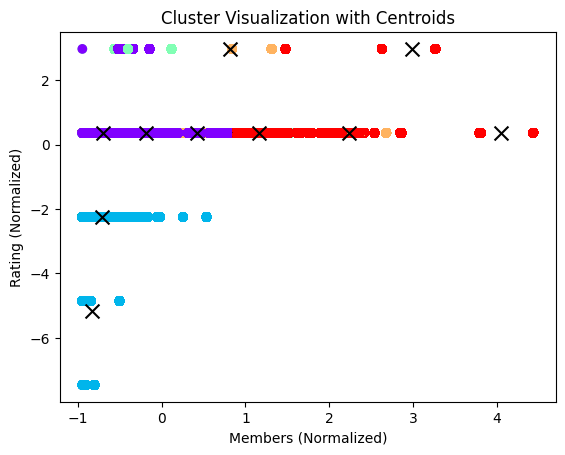

In [141]:
# Get cluster cetroids
centroids = kmeans.cluster_centers_
# Plot data points and cluster centroids
plt.scatter(merged_df["members"],merged_df["rating"],c=merged_df["cluster"], cmap="rainbow")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x",s=100,c="black")
plt.xlabel("Members (Normalized)")
plt.ylabel("Rating (Normalized)")
plt.title("Cluster Visualization with Centroids")
plt.show()

## Cluster Size Distribution

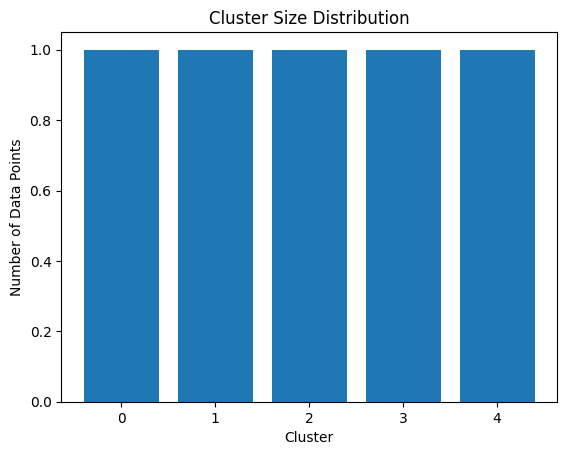

In [142]:
# Count data points in each cluster
cluster_counts = merged_df["cluster"].value_counts().sort_index()

# plot cluster size distribution
plt.bar(cluster_counts.index, cluster_counts.value_counts())
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.title("Cluster Size Distribution")
plt.show()

## Silhouette Plot

In [ ]:
# Calculate silhouette samples
silhouette_values = silhouette_samples(merged_df[numerical_features],merged_df["cluster"])

# Plot silhouette plot
plt.figure(figsize=(10,6))
y_lower = 10
for i in range(optimal_k):
    ith_cluster_silhouette_values = silhouette_values[merged_df["cluster"]==i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i)/ optimal_k)
    plt.fill_between(np.arange(y_lower,y_upper), 0, ith_cluster_silhouette_values, facecolor=color,alpha=0.7)
    plt.text(-0.05,y_lower + 0.05*size_cluster_i,str(i))
    y_lower = y_upper + 10

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot")
plt.show()

## Project Report

### Clustering Analysis on Anime Dataset: 
<p style="text-align: justify;">
A Report In this project, I embarked on the task of performing clustering analysis on the "anime.csv" dataset to gain insights into the distribution of anime titles based on their "members" and "rating" attributes. The project provided valuable hands-on experience in data preprocessing, algorithm implementation, and result interpretation.
Learning and Implementation Process:
The project began with loading and cleaning the dataset. Missing values were dropped to ensure data integrity. Next, I selected the relevant numerical features for clustering, namely "members" and "rating." The StandardScaler was applied to normalize the features, making them comparable in the clustering process.
To determine the optimal number of clusters (kkk), the "Elbow Method" was employed. The within-cluster sum of squares (WCSS) was calculated for various kkk values and plotted against them. Visual analysis of the graph helped identify the "elbow point," representing a balance between data compression and overfitting. Choosing the optimal kkk was challenging due to the subjective nature of this decision.
KMeans clustering was executed using the chosen kkk, and the silhouette score was employed to evaluate cluster quality. The silhouette score provided a quantitative measure of how well data points were grouped within clusters. The visualization of clusters in scatter plots and silhouette plots enhanced my understanding of the results.
Difficulties Faced:
The primary challenge encountered was selecting the optimal number of clusters. While the elbow method offered guidance, subjectivity played a role in interpreting the graph and making a decision. Balancing model complexity and meaningful clusters required careful consideration.
Another difficulty emerged in interpreting the silhouette score. Although higher scores indicated better-defined clusters, assigning a threshold for a "good" score was intricate. Contextualizing the score within the domain knowledge was crucial, which proved a complex task in the absence of explicit ground truth labels.
Additionally, managing the computational time for silhouette score calculation was challenging. The computation time increased with dataset size, necessitating optimization techniques like using smaller subsets or parallel computation.
Key Takeaways:
Through this project, I learned that clustering is both an art and a science. It involves a blend of statistical techniques and subjective judgment to generate meaningful insights. The project reinforced the importance of considering domain knowledge and context in interpreting clustering results, especially when quantitative metrics alone might not tell the full story.
Difficulties in selecting kkk and interpreting scores highlighted the need for a holistic approach. It's essential to explore multiple angles, visualize results, and collaborate with domain experts to validate findings.
In conclusion, this project expanded my knowledge of unsupervised learning techniques, honed my ability to select appropriate metrics for evaluation, and provided insights into the intricacies of clustering analysis. It highlighted the balance between quantitative measures and qualitative judgment in uncovering patterns within data. Clustering remains a powerful tool for discovering hidden structures in datasets, and I am excited to continue exploring its applications in various domains.</p>
